In [1]:
%load_ext autoreload
%autoreload 2

    
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from TraceGenerator import TraceDataGeneration, AutoGenerator
#from TraceDataGeneration_single_trace import TraceDataGeneration

In [265]:
function_list = ['impulse_like',
                 'linear_transition',
                 'trapezoidal',
                 'triangular']

In [266]:
cps_list = []
df_list = []
for i in range(10):
    size = np.random.randint(3, 7)
    function = list(np.random.choice(function_list, size=2, replace=True))

    gen = AutoGenerator(n=2, max_value=100, min_value=0, function=function)
    df, param = gen.generate_random_trace(return_param=True)

    for para in param:
        cps_list.append(find_cps(para))

    df_group = df.groupby('WAFER_ID')
    df_ = [group[1] for group in df_group]
    df_list.append(df_)

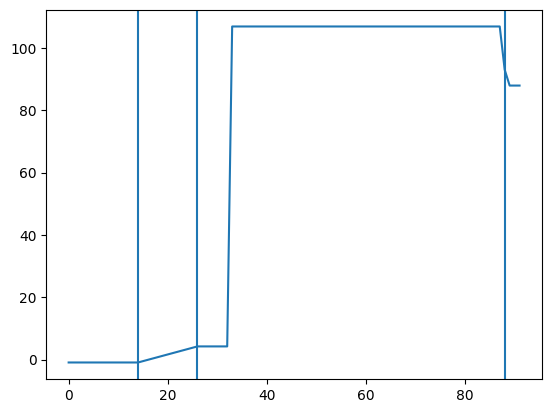

In [275]:
plt.plot(df_list[0][0].PARAMETER_VALUE)
for v in cps_list[0]:
    plt.axvline(v)
plt.show(()

In [264]:
size = np.random.randint(3, 7)

In [243]:
function = list(np.random.choice(function_list, size=2, replace=True))
function

['impulse_like', 'linear_transition']

In [219]:
gen = AutoGenerator(n=2, max_value=100, min_value=0, function=function)

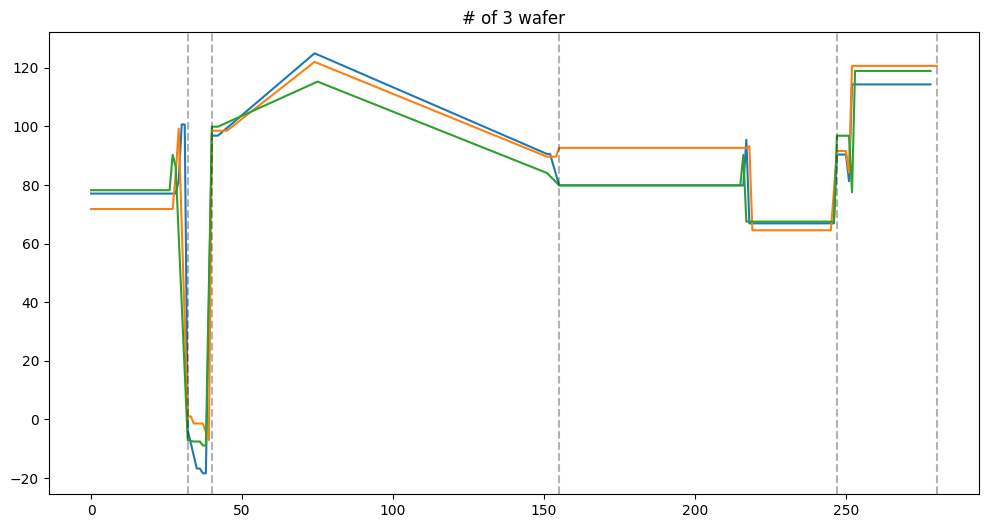

In [220]:
df, param = gen.generate_random_trace(return_param=True)
gen.trace_checker(df)

In [221]:
cps_list = []
for para in param:
    cps_list.append(find_cps(para))

In [222]:
cps_list[2]

[27, 29, 31, 33, 34, 38, 71, 147, 209, 245]

In [223]:
df_group = df.groupby('WAFER_ID')
df_list = [group[1] for group in df_group]

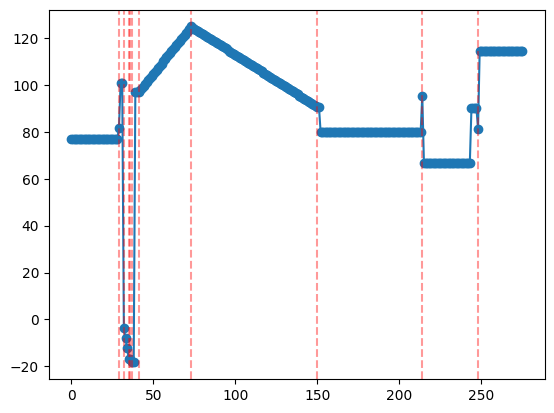

In [224]:
i = 0

plt.plot(df_list[i].PARAMETER_VALUE, marker='o')
for v in cps_list[i]:
   plt.axvline(v, color='red', linestyle='--', alpha=0.4)
#plt.ylim(-10, 20)
plt.show()

In [88]:
cps = [16, 49, 64, 72+52, 72+149+3]

In [131]:
def create_cps_list_v2(data):
    cps = []
    accumulated_length = 0
    
    for item in data:
        # 정렬된 time 키를 기준으로 cps 리스트에 시간 값을 추가
        for key in sorted(item.keys()):
            if key.startswith('time'):
                cps.append(item[key] + accumulated_length)
        
        # 길이를 누적하여 갱신
        accumulated_length += item.get('length', 0)
        
    # 마지막으로 누적 길이를 cps에 추가
    cps.append(accumulated_length)
    cps = cps[:-1]

    return cps

In [138]:
def find_cps(data):
    cps = []
    accumulated_length = 0  # 누적 길이를 저장할 변수 초기화
    
    for item in data:
        # 'time'으로 시작하는 모든 키 찾기 및 정렬
        time_keys = sorted(key for key in item if key.startswith('time'))
        # 정렬된 time 키를 기준으로 cps 리스트에 시간 값을 추가
        cps.extend(item[key] + accumulated_length for key in time_keys)
        # 길이를 누적하여 갱신
        accumulated_length += item.get('length', 0)
        
    return cps

In [136]:
create_cps_list_v3(param[0])

[16, 49, 64, 124, 224]

In [123]:
cps

[16, 49, 64, 124, 224]

In [78]:
function

['triangular', 'impulse_like', 'impulse_like']

In [148]:
param[0]

[{'start_value': 96.28358177413826,
  'peak_value': 70.6095994632015,
  'end_value': 66.01317753394243,
  'time1': 16,
  'time2': 49,
  'time3': 64,
  'length': 72},
 {'start_value': 120.20277177647117,
  'peak_value': 90.29261847967268,
  'end_value': 83.75871957305733,
  'time1': 52,
  'length': 149},
 {'start_value': 6.715639218470541,
  'peak_value': 17.42532795019446,
  'end_value': 1.8418251793284999,
  'time1': 3,
  'length': 26}]

In [153]:
param[2]

[{'start_value': 96.28358177413826,
  'peak_value': 70.6095994632015,
  'end_value': 66.01317753394243,
  'time1': 16,
  'time2': 49,
  'time3': 64,
  'length': 72},
 {'start_value': 120.20277177647117,
  'peak_value': 90.29261847967268,
  'end_value': 83.75871957305733,
  'time1': 52,
  'length': 149},
 {'start_value': 6.715639218470541,
  'peak_value': 17.42532795019446,
  'end_value': 1.8418251793284999,
  'time1': 3,
  'length': 26}]

In [24]:
time_params = [s for s in param[0][0] if 'time' in s]

In [25]:
time_params

['time1', 'time2', 'time3']